# 1. Imports


In [5]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import seaborn as sns
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn'

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. Open and Concat Files

In [6]:
file_path = '/content/drive/MyDrive/Artigos-MLR/resultados_completos_v2/'

In [7]:

# # listing files
# list_files = os.listdir(file_path)
# df = pd.DataFrame()
# for file in list_files:
#   df_temp = pd.read_excel(file_path+file)
#   print(file, df_temp.shape)
#   # print(df_temp.columns)
#   print(df_temp[['Rodada Snowballing', 'Tipo Snowballing', ]].isna().sum())
#   df = pd.concat([df, df_temp], axis=0, ignore_index=True)

# print(df.shape)

# df.to_excel(file_path+'resultados_todas_rodadas_comparativo_v2.xlsx', index=False)

# 3. Read Full Table

In [8]:

df = pd.read_excel(file_path+'resultados_todas_rodadas_comparativo_v2.xlsx')

In [9]:
# applying treatment in column names
df['IC-manual'] = np.where(
    df['IC-manual'].isna(),
    df['IC1-manual'],
    df['IC-manual']
)

# 4. Data Analysis

In [10]:
# check for nulls
df[['Rodada Snowballing', 'Tipo Snowballing', ]].isna().sum()

,0
Rodada Snowballing,0
Tipo Snowballing,0


In [11]:
# check data
df[['Rodada Snowballing', 'Tipo Snowballing', ]].value_counts().sort_index().sum()

np.int64(1806)

In [12]:
# check data in each round/snowballing type
df[['Rodada Snowballing', 'Tipo Snowballing', ]].value_counts().sort_index()

Rodada Snowballing  Tipo Snowballing
1                   Forward             1019
2                   Backward             157
                    Forward              117
3                   Backward             102
                    Forward              104
4                   Backward              99
                    Forward               73
5                   Backward             132
                    Forward                3
Name: count, dtype: int64

In [13]:
# removing duplicates
df[df['EC4-manual'] != True].drop_duplicates().shape

(1784, 32)

In [14]:
# de-duplicating: one more check
df_selected_columns = df[df['EC4-manual'] != True][[
    'Título','Tipo Snowballing', 'Rodada Snowballing',
    'IC-manual', 'EC1-manual',
    'IC ChatGPT v2', 'EC1 ChatGPT v2'
]].drop_duplicates()

In [15]:
# final shape
df_selected_columns.shape

(1751, 7)

In [16]:
df_selected_columns[['Rodada Snowballing', 'Tipo Snowballing', ]].value_counts().sort_index()

Rodada Snowballing  Tipo Snowballing
1                   Forward             1016
2                   Backward             148
                    Forward              110
3                   Backward              95
                    Forward              103
4                   Backward              96
                    Forward               65
5                   Backward             115
                    Forward                3
Name: count, dtype: int64

## 4.1 Analysis 1: Exclusion Criteria 1
- language filter

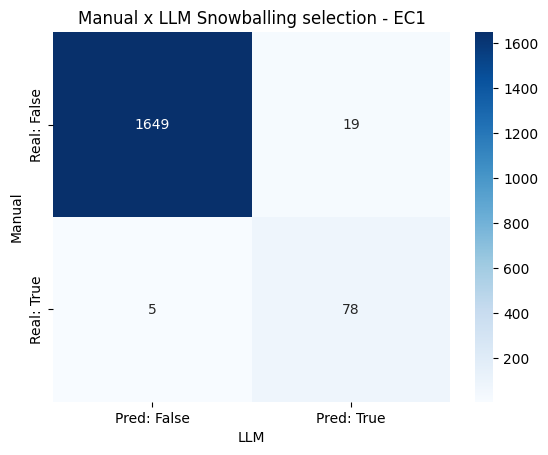

In [17]:
cm = confusion_matrix(
    df_selected_columns['EC1-manual'],
    df_selected_columns['EC1 ChatGPT v2'],
    labels=[False, True]
)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred: False', 'Pred: True'],
            yticklabels=['Real: False', 'Real: True'])
plt.xlabel("LLM")
plt.ylabel("Manual")
plt.title("Manual x LLM Snowballing selection - EC1")
plt.show()

In [18]:
print(classification_report(
    df_selected_columns['EC1-manual'],
    df_selected_columns['EC1 ChatGPT v2'], )
)

              precision    recall  f1-score   support

       False       1.00      0.99      0.99      1668
        True       0.80      0.94      0.87        83

    accuracy                           0.99      1751
   macro avg       0.90      0.96      0.93      1751
weighted avg       0.99      0.99      0.99      1751



## 4.2 Analysis 2: Inclusion Criteria
- MLOps maturity model

In [19]:
df_selected_columns['IC ChatGPT v2'] = df_selected_columns['IC ChatGPT v2'].astype('bool')
df_selected_columns['IC-manual'] = df_selected_columns['IC-manual'].astype('bool')

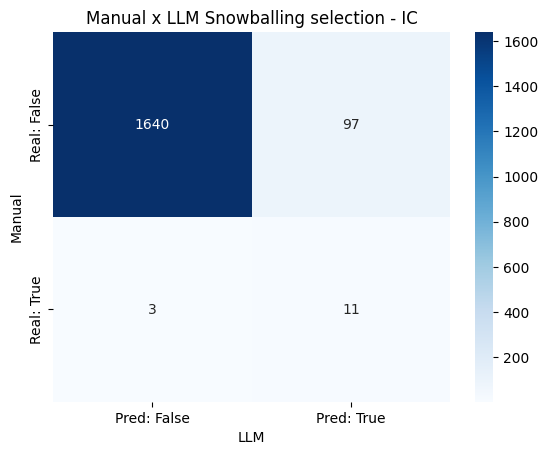

In [20]:
cm = confusion_matrix(
    df_selected_columns['IC-manual'],
    df_selected_columns['IC ChatGPT v2'],
    labels=[False, True]
)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred: False', 'Pred: True'],
            yticklabels=['Real: False', 'Real: True'])
plt.xlabel("LLM")
plt.ylabel("Manual")
plt.title("Manual x LLM Snowballing selection - IC")
plt.show()

In [21]:
from sklearn.metrics import classification_report

print(classification_report(
    df_selected_columns['IC-manual'],
    df_selected_columns['IC ChatGPT v2'],)
)

              precision    recall  f1-score   support

       False       1.00      0.94      0.97      1737
        True       0.10      0.79      0.18        14

    accuracy                           0.94      1751
   macro avg       0.55      0.86      0.58      1751
weighted avg       0.99      0.94      0.96      1751



---
---